Initialize. Call the commandoes:

In [12]:
# Initialization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import fixed_quad
from scipy import integrate
from scipy.integrate import quad
from scipy.integrate import odeint
from sympy.solvers import solve
from sympy import Symbol
import math
from math import exp, expm1
from dataclasses import dataclass
from scipy.integrate import simps
from ipykernel import kernelapp
from scipy.integrate import dblquad
import numpy as np

In [13]:
# Define constants and reaction
Name = ["A", "B"]
Concentration_initial = [0.07174, 0]
Coefficient = [1, -2]
Order = np.abs(Coefficient)
Rate_constant_forward = 0.5
Rate_constant_reverse = 0.5/0.1
Reversible = True 

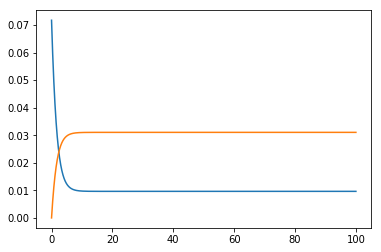

In [19]:
# Define the class of the reaction 
class reaction:
    def __init__(self, Name, Coefficient, Concentration_initial, Order, 
Rate_constant_forward, Rate_constant_reverse, Reversible = True):
        self.Name = Name 
        self.Coefficient = Coefficient  
        self.Concentration_initial = Concentration_initial
        self.Order = Order 
        self.Reversible = Reversible
        self.Rate_constant_forward = Rate_constant_forward
        self.Rate_constant_reverse = Rate_constant_reverse
        self.t_start = 0
        self.t_end = 100 
        self.steps = (self.t_end - self.t_start)*24
# Define the function  
    def reaction_function (self, C, t):
# Find the coefficients of reactants and products:
        coef_reactants = list(filter(lambda Coefficient: Coefficient >0, Coefficient))
        coef_products = list(filter(lambda Coefficient: Coefficient <0, Coefficient))

# Find the rate for the reversible     
        if self.Reversible == True:
            r_for = 1;
            r_reverse = 1;
            self.KC = self.Rate_constant_forward/self.Rate_constant_reverse
            n = len(Coefficient);
            r = np.zeros((n,1));
            
            for i in range(0,len(coef_reactants)): 
                r_f = C[i]**Order[i]
                r_for = r_f*r_for 
            
            for i in range(len(coef_reactants),len(Coefficient)):
                r_r = C[i]**Order[i]
                r_reverse = r_r*r_reverse
            
            rate = self.Rate_constant_forward*(r_for - r_reverse/self.KC)
            r[0,0] = rate;
            dCdt = [];
            for i in range(0,len(Coefficient)):
                r[i,0] = r[0]/self.Coefficient[i]
                dCdt.append(-r[i,0])

        if self.Reversible == False:
            rate_for = 1;
            n = len(Coefficient);
            r = np.zeros((n,1));
            for i in range(len(coef_reactants)): 
                r = C[i]**Order[i]
                rate_for = r*rate_for
            rate = self.Rate_constant_forward*rate_for
            r[0] = rate;
            dCdt = [];
            for i in range(len(Coefficient)):
                r[i] = -r[0]/self.Coefficient[i]
                dCdt.append(r[i])
        
        return (dCdt)
    
    def solve(self):
        t = np.linspace(self.t_start, self.t_end, self.steps)
        C = odeint(self.reaction_function, self.Concentration_initial ,t)
        return t, C

reaction = reaction(Name, Coefficient, Concentration_initial, Order, 
                    Rate_constant_forward, Rate_constant_reverse, Reversible = True)
reaction.solve()

plt.plot(reaction.solve()[0],reaction.solve()[1])
plt.show()